In [1]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
# Download the data set
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=4,
                    validation_data=(test_images, test_labels))


Epoch 1/4
1563/1563 [==============================] - 47s 30ms/step - loss: 1.5388 - accuracy: 0.4388 - val_loss: 1.2703 - val_accuracy: 0.5399
Epoch 2/4
1563/1563 [==============================] - 48s 30ms/step - loss: 1.1668 - accuracy: 0.5875 - val_loss: 1.0739 - val_accuracy: 0.6211
Epoch 3/4
1563/1563 [==============================] - 46s 29ms/step - loss: 1.0045 - accuracy: 0.6476 - val_loss: 1.0786 - val_accuracy: 0.6206
Epoch 4/4
1563/1563 [==============================] - 46s 30ms/step - loss: 0.8986 - accuracy: 0.6862 - val_loss: 0.9421 - val_accuracy: 0.6694


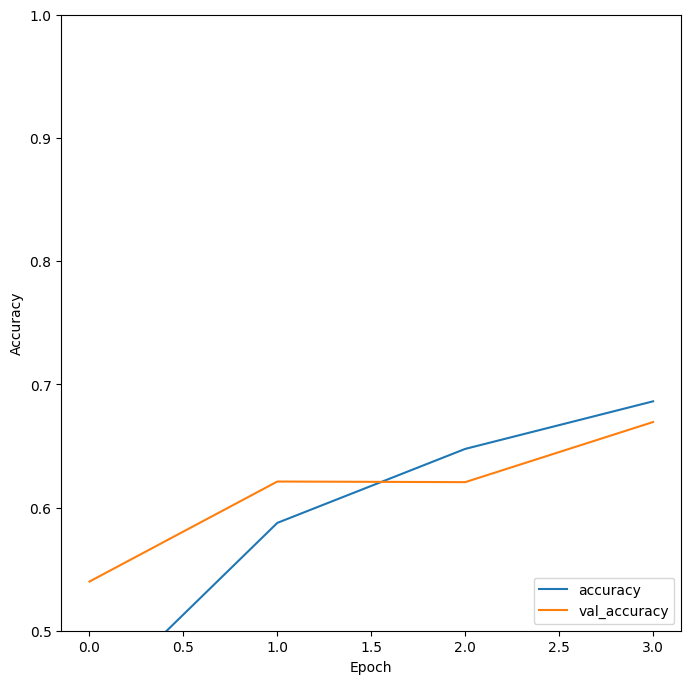

In [6]:
plt.figure(figsize=(8, 8))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

plt.savefig("output_report.png")